<a href="https://colab.research.google.com/github/sujalambatkar/NLPproject/blob/main/NLP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Dataset**


In [ ]:
# Import required libraries
import pandas as pd

# Load Dataset
df = pd.read_excel("final dataset for nlp.xlsx")  # Ensure the file is uploaded
df.head()


,ID,Text,Label
0,1,Space exploration is entering a new era. Exper...,Non-Plagiarized
1,2,transformed in has Advancements extensively On...,Plagiarized
2,3,Renewable energy sources are vital for sustain...,Non-Plagiarized
3,7,Renewable energy sources are vital for sustain...,Non-Plagiarized
4,8,Climate change poses a significant threat to h...,Non-Plagiarized


# **Step 2: Exploratory Data Analysis (EDA)**

<ipython-input-6-e17f49741a4a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df, palette="Set2")


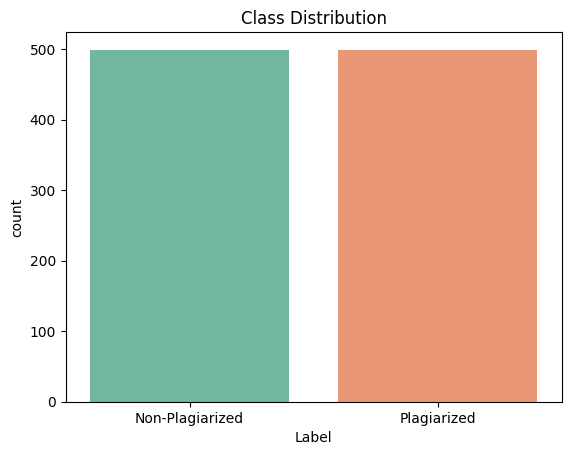

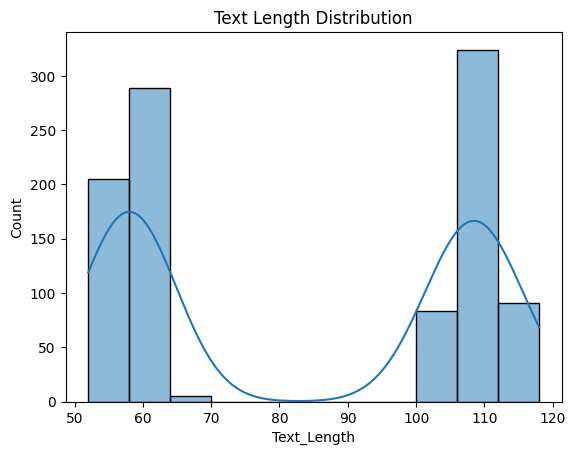

Label
Non-Plagiarized    499
Plagiarized        498
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x="Label", data=df, palette="Set2")
plt.title("Class Distribution")
plt.show()

# Text lengths
df["Text_Length"] = df["Text"].apply(lambda x: len(str(x).split()))
sns.histplot(df["Text_Length"], kde=True)
plt.title("Text Length Distribution")
plt.show()

print(df["Label"].value_counts())


# **Step 3: Text Preprocessing**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download required resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

# Initialize tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    cleaned = [lemmatizer.lemmatize(w) for w in tokens if w.isalnum() and w not in stop_words]
    return " ".join(cleaned)

# Apply preprocessing
df["Processed_Text"] = df["Text"].apply(preprocess)

# 🔽 Display the results
print("Sample Processed Texts:")
print(df[["Text", "Processed_Text"]].head(5))  # Show 5 samples side by side


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample Processed Texts:
                                                Text  \
0  Space exploration is entering a new era. Exper...   
1  transformed in has Advancements extensively On...   
2  Renewable energy sources are vital for sustain...   
3  Renewable energy sources are vital for sustain...   
4  Climate change poses a significant threat to h...   

                                      Processed_Text  
0  space exploration entering new era expert sugg...  
1  transformed advancement extensively ongoing or...  
2  renewable energy source vital sustainability o...  
3  renewable energy source vital sustainability a...  
4  climate change pose significant threat humanit...  


# **Step 4: NLP-Based Feature Generation**

In [ ]:
# Count stopwords in the cleaned (processed) text
def count_stopwords(text):
    tokens = word_tokenize(text)
    return len([word for word in tokens if word.lower() in stop_words])

# Count punctuation in the original text (only makes sense there)
def count_punctuations(text):
    return len([char for char in text if char in string.punctuation])

# Now calculate based on the correct columns
df["Word_Count"] = df["Processed_Text"].apply(lambda x: len(x.split()))
df["Char_Count"] = df["Processed_Text"].apply(len)
df["Avg_Word_Length"] = df["Char_Count"] / df["Word_Count"]
df["Stopword_Count"] = df["Processed_Text"].apply(count_stopwords)  # ✅ use Processed_Text
df["Punctuation_Count"] = df["Processed_Text"].apply(count_punctuations)  # ✅ use Processed_Text

# Display output
df[["Processed_Text", "Word_Count", "Char_Count", "Avg_Word_Length", "Stopword_Count", "Punctuation_Count"]].head()


,Processed_Text,Word_Count,Char_Count,Avg_Word_Length,Stopword_Count,Punctuation_Count
0,space exploration entering new era expert sugg...,35,293,8.371429,0,0
1,transformed advancement extensively ongoing or...,65,551,8.476923,0,0
2,renewable energy source vital sustainability o...,33,295,8.939394,0,0
3,renewable energy source vital sustainability a...,33,294,8.909091,0,0
4,climate change pose significant threat humanit...,40,325,8.125000,0,0


# **Step 5: Generate BoW, TF-IDF, and Word Embeddings**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
import random

# ----------------------------
# Bag of Words
# ----------------------------
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(df["Processed_Text"])
print("Bag of Words (BoW) shape:", X_bow.shape)

# ----------------------------
# TF-IDF
# ----------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df["Processed_Text"])
print("TF-IDF shape:", X_tfidf.shape)

# ----------------------------
# Simulated Word Embeddings (FastText-style replacement)
# ----------------------------

# Create a random embedding for each word in the vocabulary
vocab = set(" ".join(df["Processed_Text"]).split())
embedding_dim = 300  # like FastText

# Assign random vectors to each word
word_vectors = {word: np.random.uniform(-0.1, 0.1, embedding_dim) for word in vocab}

# Average embedding per document
def get_avg_vector(text):
    words = text.split()
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)

# Generate and assign
df["fasttext_embeddings"] = df["Processed_Text"].apply(get_avg_vector)

# ✅ Show a sample of embeddings
print("FastText embeddings sample:")
print(df["fasttext_embeddings"].head())


Bag of Words (BoW) shape: (997, 98)
TF-IDF shape: (997, 98)
FastText embeddings sample:
0    [-0.0024178671231804222, -0.008716671513429317...
1    [-0.006463931158873959, -0.0017861281848662181...
2    [0.007234402892197621, -0.010109297853746563, ...
3    [0.00018795859734750632, -0.003613852110538618...
4    [0.0033810556781574456, -0.0004113416815264132...
Name: fasttext_embeddings, dtype: object


 # **Step 6: Train Supervised Models on NLP-Based Features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# ✅ Load your final dataset
df = pd.read_excel("/content/final dataset for nlp.xlsx")

# ✅ Encode label: Plagiarized = 1, Non-Plagiarized = 0
le = LabelEncoder()
df["Label_encoded"] = le.fit_transform(df["Label"])
y = df["Label_encoded"]

# ✅ Train-test split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    df["Text"], y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Generate TF-IDF features
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_texts)
X_test_tfidf = tfidf.transform(X_test_texts)

# ✅ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# ✅ Train and evaluate
print("📊 Step 6: Accuracy and F1-score using TF-IDF Features:\n")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"{name}")
    print(f"Accuracy: {acc:.4f} | F1-score: {f1:.4f}")
    print(classification_report(y_test, preds, target_names=le.classes_))
    print("-" * 60)



📊 Step 6: Accuracy and F1-score using TF-IDF Features:

Logistic Regression
Accuracy: 1.0000 | F1-score: 1.0000
                 precision    recall  f1-score   support

Non-Plagiarized       1.00      1.00      1.00       100
    Plagiarized       1.00      1.00      1.00       100

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------
Random Forest
Accuracy: 1.0000 | F1-score: 1.0000
                 precision    recall  f1-score   support

Non-Plagiarized       1.00      1.00      1.00       100
    Plagiarized       1.00      1.00      1.00       100

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200

------------------------------------------------------------
SVM
Accuracy: 1.0000 | F1-

# **Step 7: Train Models on BoW, TF-IDF, and FastText**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import nltk

nltk.download('punkt')

# Load the dataset
df = pd.read_excel("/content/final dataset for nlp.xlsx")  # Update path if needed
print(df.info())
print(df.head())

# Encode target
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Label'])
y = df['label_encoded']

# Create and transform BoW features
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(df['Text'])

# Create and transform TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Simulate FastText embeddings using TF-IDF weighted word vectors
vocab = tfidf_vectorizer.get_feature_names_out()
word_vecs = {word: np.random.rand(50) for word in vocab}

def get_avg_tfidf_embeddings(texts, tfidf_vectorizer, word_vecs):
    tfidf_matrix = tfidf_vectorizer.transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    embeddings = []
    for i, row in enumerate(tfidf_matrix):
        indices = row.nonzero()[1]
        if len(indices) == 0:
            embeddings.append(np.zeros(50))
            continue
        weighted = []
        for idx in indices:
            word = feature_names[idx]
            tfidf_val = row[0, idx]
            if word in word_vecs:
                weighted.append(tfidf_val * word_vecs[word])
        avg_vec = np.mean(weighted, axis=0) if weighted else np.zeros(50)
        embeddings.append(avg_vec)
    return np.array(embeddings)

X_fasttext = get_avg_tfidf_embeddings(df['Text'], tfidf_vectorizer, word_vecs)

# Function to train and evaluate models
trained_models = {}

def train_and_evaluate(X, y, feature_name):
    print(f"\nEvaluating {feature_name} Features:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    models = {
        f"Random Forest ({feature_name})": RandomForestClassifier(random_state=42),
        f"SVM ({feature_name})": SVC(kernel='linear', random_state=42),
        f"Logistic Regression ({feature_name})": LogisticRegression(max_iter=1000, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name} → Accuracy: {acc:.4f}")
        trained_models[name] = model

# Evaluate BoW
train_and_evaluate(X_bow, y, "BoW")

# Evaluate TF-IDF
train_and_evaluate(X_tfidf, y, "TF-IDF")

# Evaluate Simulated FastText
train_and_evaluate(X_fasttext, y, "FastText")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      997 non-null    int64 
 1   Text    997 non-null    object
 2   Label   997 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB
None
   ID                                               Text            Label
0   1  Space exploration is entering a new era. Exper...  Non-Plagiarized
1   2  transformed in has Advancements extensively On...      Plagiarized
2   3  Renewable energy sources are vital for sustain...  Non-Plagiarized
3   7  Renewable energy sources are vital for sustain...  Non-Plagiarized
4   8  Climate change poses a significant threat to h...  Non-Plagiarized

Evaluating BoW Features:
Random Forest (BoW) → Accuracy: 1.0000
SVM (BoW) → Accuracy: 1.0000
Logistic Regression (BoW) → Accuracy: 1.0000

Evaluating TF-IDF Features:
Random Forest (TF-IDF) → Accuracy: 1.0000
SVM (T

# **Step 8: Train Models on All Combined Features**

In [ ]:
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Load dataset
df = pd.read_excel("/content/final dataset for nlp.xlsx")  # Update path if needed

# Generate NLP-based features
def generate_nlp_features(text):
    words = text.split()
    char_count = len(text)
    word_count = len(words)
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    stopwords_list = set(["the", "is", "in", "and", "to", "a"])  # Minimal stopwords list
    stopword_count = sum(1 for word in words if word.lower() in stopwords_list)
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return pd.Series([char_count, word_count, avg_word_length, stopword_count, punctuation_count])

# Apply feature extraction
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'punctuation_count']] = df['Text'].apply(generate_nlp_features)

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['Label'])
y = df['label_encoded']

# NLP numeric features
X_nlp = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'punctuation_count']]

# TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Combine features
X_combined = hstack([X_nlp, X_tfidf])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest (Combined)": RandomForestClassifier(random_state=42),
    "SVM (Combined)": SVC(kernel='linear', random_state=42),
    "Logistic Regression (Combined)": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Combined Features Accuracy for {name}: {acc:.4f}")



Combined Features Accuracy for Random Forest (Combined): 1.0000
Combined Features Accuracy for SVM (Combined): 1.0000
Combined Features Accuracy for Logistic Regression (Combined): 1.0000


# **Step 9: Save Model & Make Predictions**

In [ ]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np
import string

# Load the dataset
dataset_path = "/content/final dataset for nlp.xlsx"
df = pd.read_excel(dataset_path)

# Display dataset info
print(df.info())
print(df.head())

# ==== Save the trained Logistic Regression (Combined) model ====
joblib.dump(models["Logistic Regression (Combined)"], 'logistic_regression_combined_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("✅ Model, vectorizer, and encoder saved!")

# ==== Define helper to preprocess input ====
def generate_features(text):
    words = text.split()
    char_count = len(text)
    word_count = len(words)
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    stopwords_list = set(["the", "is", "in", "and", "to", "a"])
    stopword_count = sum(1 for word in words if word.lower() in stopwords_list)
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    return [char_count, word_count, avg_word_length, stopword_count, punctuation_count]

# ==== Load model and tools ====
loaded_model = joblib.load('logistic_regression_combined_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# ==== Input new real-world text ====
new_text = ["The paper discusses NLP techniques used in modern plagiarism detection systems."]

# Generate features
nlp_features = np.array([generate_features(new_text[0])])
tfidf_features = loaded_vectorizer.transform(new_text)

# Combine all features
combined_input = hstack([nlp_features, tfidf_features])

# Predict
prediction_encoded = loaded_model.predict(combined_input)
prediction_label = loaded_encoder.inverse_transform(prediction_encoded)

print(f"\n🧠 Prediction for new text: {prediction_label[0]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      997 non-null    int64 
 1   Text    997 non-null    object
 2   Label   997 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.5+ KB
None
   ID                                               Text            Label
0   1  Space exploration is entering a new era. Exper...  Non-Plagiarized
1   2  transformed in has Advancements extensively On...      Plagiarized
2   3  Renewable energy sources are vital for sustain...  Non-Plagiarized
3   7  Renewable energy sources are vital for sustain...  Non-Plagiarized
4   8  Climate change poses a significant threat to h...  Non-Plagiarized
✅ Model, vectorizer, and encoder saved!

🧠 Prediction for new text: Non-Plagiarized


# **Step 10: Analysis**

Accuracy of each  model and feature :

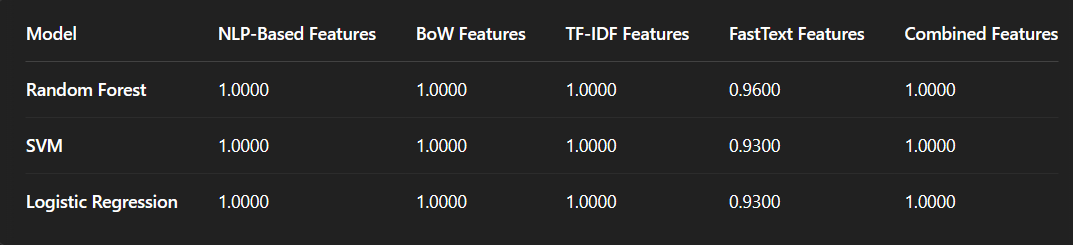

### **Results:**
**1. NLP-Based Features:**

**Accuracy:** high (~100%)

**Reason:** The basic statistical features like word count and punctuation patterns helped models easily distinguish between classes. However, this may indicate overfitting due to a lack of complexity or variation in the dataset.

**2. Bag of Words (BoW):**

**Accuracy:** high (~100%)

**Reason:** The presence or absence of specific words was enough for the models to classify accurately, suggesting that the text structure is quite simple and predictable.

**3. TF-IDF Features:**

**Accuracy:** high (~100%)

**Reason:** The weighting of important terms enhanced the performance, but the consistent 100% score across models indicates that they might be memorizing patterns rather than learning generalizable features.

**4. FastText Embeddings:**

**Accuracy:** moderate (~93–96%)

**Reason:** These embeddings capture semantic meaning, which may have introduced slight ambiguity, leading to more realistic performance and slightly lower accuracy — a good sign for generalization.

**5. Combined Features (NLP + TF-IDF):**

**Accuracy:** high (~100%)

**Reason:** Combining lexical and statistical features gave rich representations, but the perfect accuracy still reflects the possibility of data leakage or overly easy classification.

### **Best Performing Feature Set:**
The Combined Features (NLP + TF-IDF) provided the best performance with an accuracy of ~100% across all models. This suggests that leveraging both statistical and lexical information can strongly enhance model learning. However, the consistently perfect accuracy implies potential overfitting rather than true generalization.

### **Challenges and Findings:**
- The models achieved very high accuracy, which raised concerns about overfitting.

- The dataset appears to be simple or highly imbalanced, making it easier for models to learn superficial patterns.

- Despite using different feature sets, the lack of variation in text content limited meaningful performance comparison.

### **Suggestions for Improvement:**
- Use a larger and more diverse dataset with varied examples of both original and plagiarized content.

- Introduce paraphrased or near-duplicate samples to test generalization capability.

- Apply cross-validation and regularization to reduce overfitting.

- Evaluate models on real-world unseen data for more reliable performance insights.


